### aim: 

summary mld, sst, overturning figures
- calculate in /gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperFigures/intermediateCalculations/calculateSSTsouthof50.py and the like!!!


### date: 

In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [10]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [11]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [12]:

scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}


In [13]:
# mld_1A = xr.open_dataset('./intermediateCalculations/_-50_somxl010_1A.nc')
# mld_1A

In [14]:
mld_1A = xr.open_dataset('../intermediateCalculations/_-50_somxl010_1A.nc')
mld_1B = xr.open_dataset('../intermediateCalculations/_-50_somxl010_1B.nc')
mld_2A = xr.open_dataset('../intermediateCalculations/_-50_somxl010_2A.nc')
mld_2B = xr.open_dataset('../intermediateCalculations/_-50_somxl010_2B.nc')
mld_3A = xr.open_dataset('../intermediateCalculations/_-50_somxl010_3A.nc')
mld_3B = xr.open_dataset('../intermediateCalculations/_-50_somxl010_3B.nc')




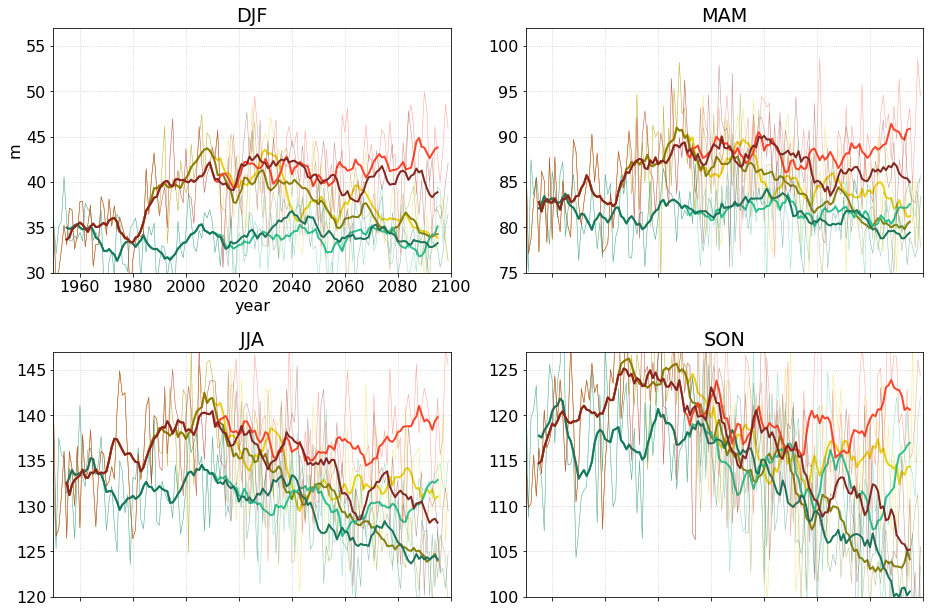

In [44]:
mldset = [mld_1A, mld_1B, mld_2A, mld_2B, mld_3A, mld_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for x in range(0,6):
    tsc = scens[x]
    mld = mldset[x]
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
tits = ['DJF','MAM','JJA','SON']
low = [30,75,120,100]
for i in range(0,4):
    axs[i].set_title(tits[i])
    axs[0].set_ylabel('m')
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylim([low[i],low[i]+27])
    #axs[1].legend(loc = 'upper left', ncol = 2, fontsize = 10)
    axs[i].grid(linestyle = ':', color = 'grey', alpha = 0.4)
    
for i in range(1,4):
#     axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
    axs[i].set_xlabel('')

#plt.suptitle('Mixed Layer Depth, averaged ')
plt.tight_layout()
#fig.savefig('./figs/Fig-MLD.jpg')

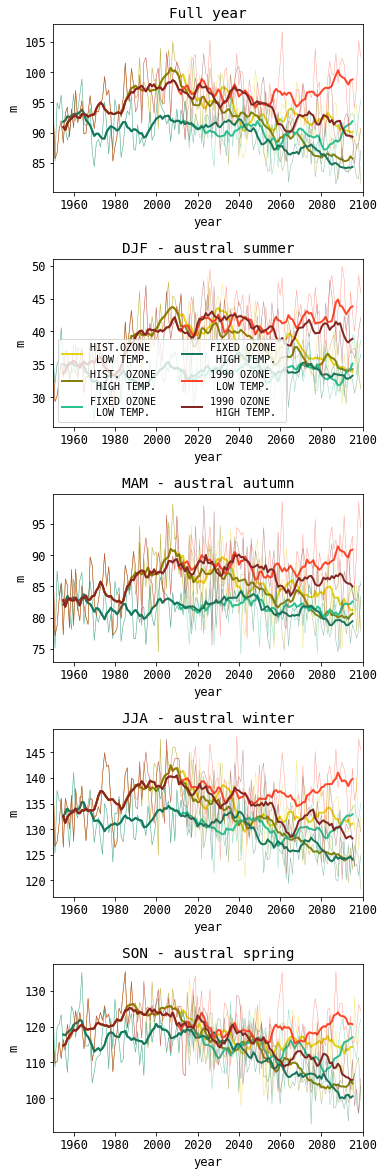

In [16]:
mldset = [mld_1A, mld_1B, mld_2A, mld_2B, mld_3A, mld_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

fact = 1.1
fig, axs = plt.subplots(5,1, figsize=(5*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for x in range(0,6):
    tsc = scens[x]
    mld = mldset[x]
    
    ind = 0
    tv = mld.somxl010.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 1
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 2
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 3
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
    ind = 4
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
tits = ['Full year', 'DJF - austral summer','MAM - austral autumn','JJA - austral winter','SON - austral spring']
for i in range(0,5):
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('m')
    axs[i].set_xlim([1950,2100])
    axs[1].legend(loc = 'lower left', ncol = 2, fontsize = 10)

#plt.suptitle('Mixed Layer Depth, averaged ')
plt.tight_layout()
#fig.savefig('./figs/Fig-MLD.jpg')

In [17]:
tv

<xarray.DataArray 'somxl010' (year: 150)>
array([116.17187901, 109.82181147, 110.29975095, 115.66330575,
       111.09044539, 116.36947906, 113.54970402, 120.60310841,
       116.46333053, 117.24544197, 119.07741767, 124.3893685 ,
       119.24249632, 123.95754724, 119.9946371 , 113.83578961,
       118.95653948, 127.82759856, 120.22722583, 110.46235939,
       113.95866852, 122.97563116, 121.40695528, 123.91339754,
       121.68787643, 125.76337939, 122.50956814, 123.45788001,
       119.40124196, 107.44999709, 114.71434674, 118.30822424,
       125.06885738, 123.52856099, 130.02458787, 135.27346088,
       119.64395475, 123.5453933 , 132.51607502, 122.2529492 ,
       115.0054848 , 124.87720171, 123.36887431, 116.74292745,
       132.5514909 , 124.77564705, 125.43175488, 121.4815434 ,
       125.88339134, 122.55800895, 126.68858759, 130.29595829,
       114.60103432, 123.04339414, 125.11608209, 122.72736701,
       128.05196567, 112.91167334, 125.66804377, 127.57870069,
       122.46092249, 125.74579763, 125.47912068, 107.00434735,
       106.28890165, 129.49410796, 117.62395256, 120.00353453,
       128.55733981, 115.91508494, 123.21261304, 125.46448453,
       121.477335  , 125.26139273, 123.97917067, 122.29280769,
       107.53775147, 119.77878038, 108.05275535, 113.7807777 ,
       109.21571238, 115.21062043, 115.79572047, 122.39519871,
       111.64033879, 118.49316109, 121.16707731, 116.71889655,
       118.65457569, 128.71818817, 128.21069524, 123.87148572,
       104.03132531, 109.51496388, 115.22106151, 120.52138782,
       110.32273182, 122.36251147, 111.43868301, 119.09688044,
       118.47379071, 120.99132598, 114.84262834, 113.59022633,
       109.83193268, 120.64405255, 119.2413987 , 106.08295975,
       112.63706814, 101.83803478, 113.73252111, 107.7586955 ,
       108.50663917, 106.72674898, 108.51879431, 111.37496003,
       111.04812653, 110.9721365 , 112.67561142, 115.77984841,
       115.46593304, 120.75921501, 115.73668982, 109.36212822,
       108.12834064, 101.58658415, 103.95136965, 110.06440235,
       121.07456538, 103.01305905, 119.78103145, 108.08882819,
       105.02906529, 114.7433896 , 123.0593038 , 115.30159286,
       102.42531304, 103.94534228, 102.34251296, 105.0502295 ,
       104.23640953, 109.84674184, 115.60265945, 107.1815655 ,
       102.26158808, 110.81408413,  97.80435942, 102.70767416,
        96.03426974, 105.52220779])
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2095 2096 2097 2098 2099

temperature scenarios

In [18]:
# sst calculated in intermediatCalculations/calculate_SST_alternate.ipynb
def make_yearlist_SST(yrst, yren, tscen):
    print(f'SCENARIO {tscen}')
    dslist = []
    for y in range(yrst,yren):

        try:
            td = glob.glob(f'/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperFigures/intermediateCalculations/y{y}*SST_{tscen}.nc')
            dslist.append(td[0])
        except:
            pass
            print(f'FAIL {tscen},{y}')
    return dslist



ty_1A =  make_yearlist_SST(1950, 2100, '1A')
SST_1A_prelim = xr.open_mfdataset(ty_1A)
ty_1B =  make_yearlist_SST(1950, 2100, '1B')
SST_1B_prelim = xr.open_mfdataset(ty_1B)
ty_2A =  make_yearlist_SST(1950, 2100, '2A')
SST_2A_prelim = xr.open_mfdataset(ty_2A)
ty_2B =  make_yearlist_SST(1950, 2100, '2B')
SST_2B_prelim = xr.open_mfdataset(ty_2B)
ty_3A =  make_yearlist_SST(1950, 2100, '3A')
SST_3A_prelim = xr.open_mfdataset(ty_3A)
ty_3B =  make_yearlist_SST(1950, 2100, '3B')
SST_3B_prelim = xr.open_mfdataset(ty_3B)

SCENARIO 1A
SCENARIO 1B
SCENARIO 2A
SCENARIO 2B
SCENARIO 3A
SCENARIO 3B


## silly fix to get around chunk size bug

In [19]:

SST_1A = mld_1A.copy(deep = True)
SST_1A=SST_1A.rename(name_dict={'somxl010':'votemper'})
SST_1A.votemper.values = SST_1A_prelim.votemper.values

SST_1B = mld_1A.copy(deep = True)
SST_1B=SST_1B.rename(name_dict={'somxl010':'votemper'})
SST_1B.votemper.values = SST_1B_prelim.votemper.values

SST_2A = mld_1A.copy(deep = True)
SST_2A=SST_2A.rename(name_dict={'somxl010':'votemper'})
SST_2A.votemper.values = SST_2A_prelim.votemper.values

SST_2B = mld_1A.copy(deep = True)
SST_2B=SST_2B.rename(name_dict={'somxl010':'votemper'})
SST_2B.votemper.values = SST_2B_prelim.votemper.values

SST_3A = mld_1A.copy(deep = True)
SST_3A=SST_3A.rename(name_dict={'somxl010':'votemper'})
SST_3A.votemper.values = SST_3A_prelim.votemper.values

SST_3B = mld_1A.copy(deep = True)
SST_3B=SST_3B.rename(name_dict={'somxl010':'votemper'})
SST_3B.votemper.values = SST_3B_prelim.votemper.values



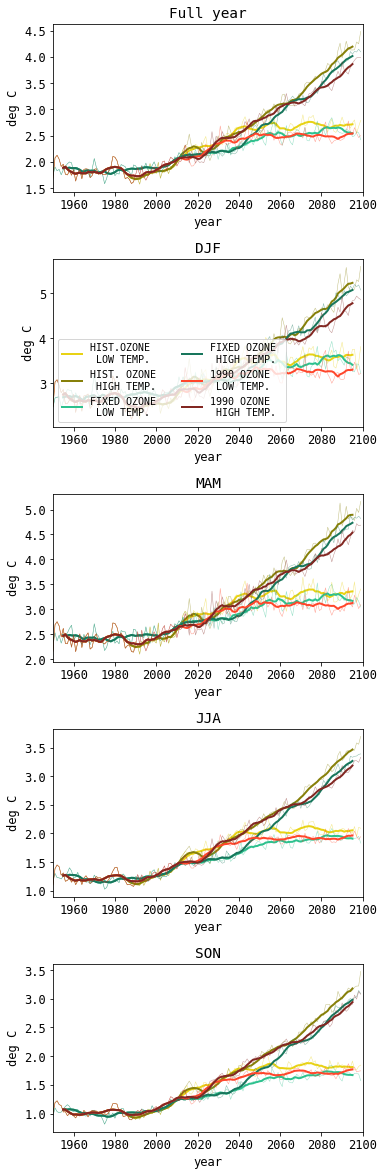

In [20]:
SSTset = [SST_1A, SST_1B, SST_2A, SST_2B, SST_3A, SST_3B,]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

fact = 1.1
fig, axs = plt.subplots(5,1, figsize=(5*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for x in range(0,6):
    tsc = scens[x]
    SST = SSTset[x]
    
    ind = 0
    tv = SST.votemper.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 1
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 2
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 3
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
    ind = 4
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
tits = ['Full year', 'DJF','MAM','JJA','SON']
for i in range(0,5):
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('deg C')
    axs[i].set_xlim([1950,2100])
    axs[1].legend(loc = 'lower left', ncol = 2, fontsize = 10)

#plt.suptitle('Mixed Layer Depth, averaged ')
plt.tight_layout()
#fig.savefig('./figs/Fig-SST.jpg')

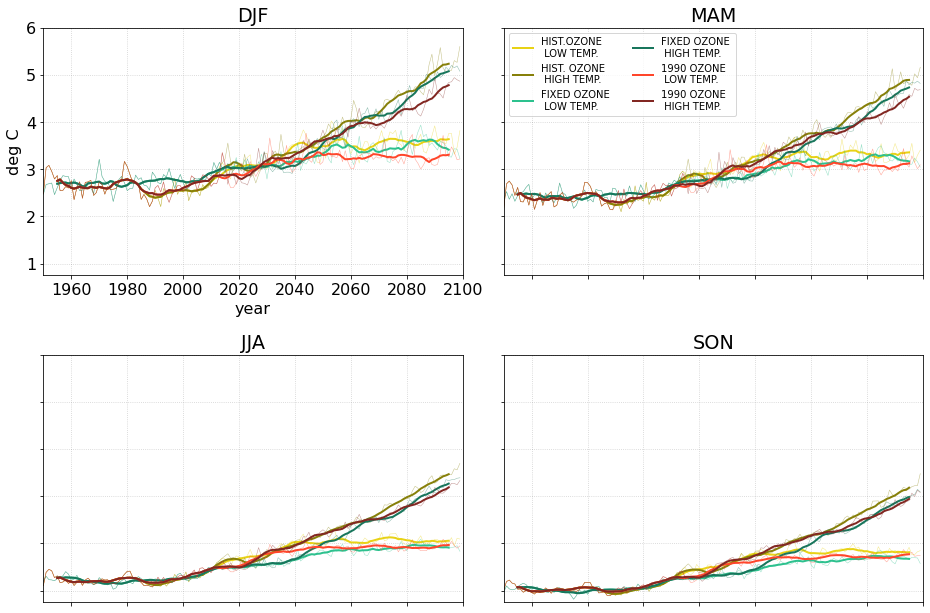

In [39]:
SSTset = [SST_1A, SST_1B, SST_2A, SST_2B, SST_3A, SST_3B,]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for x in range(0,6):
    tsc = scens[x]
    SST = SSTset[x]
    
#     ind = 0
#     tv = SST.votemper.groupby('time_counter.year').mean()
#     tv_rol = tv.rolling(year=10, center=True).mean()
#     tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
#     tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 1-1
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 2-1
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    ind = 3-1
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
    ind = 4-1
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
tits = ['DJF','MAM','JJA','SON']
for i in range(0,4):
    axs[i].set_title(tits[i])
    axs[0].set_ylabel('deg C')
    axs[i].set_xlim([1950,2100])
    axs[i].set_ylim([0.75,6])
    axs[1].legend(loc = 'upper left', ncol = 2, fontsize = 10)
    axs[i].grid(linestyle = ':', color = 'grey', alpha = 0.4)
    
for i in range(1,4):
    axs[i].set_yticklabels([])
    axs[i].set_xticklabels([])
    axs[i].set_xlabel('')

#plt.suptitle('Mixed Layer Depth, averaged ')
plt.tight_layout()
#fig.savefig('./figs/Fig-SST.jpg')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


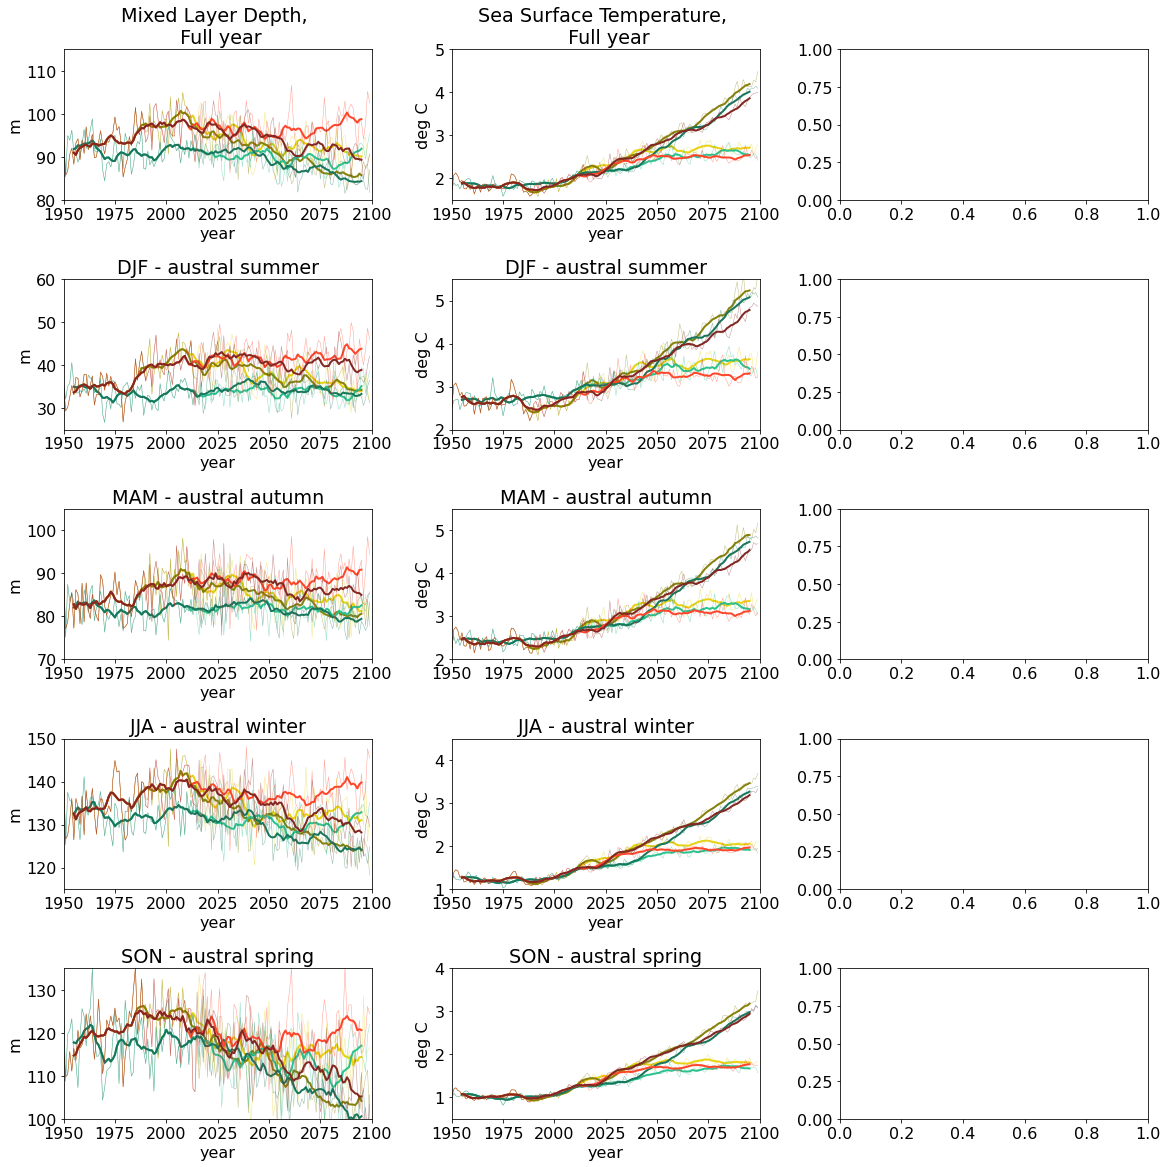

In [21]:
plt.rcParams.update({'font.size': 16})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 16}

plt.rc('font', **font)

fact = 1.1
fig, axs = plt.subplots(5,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

mldset = [mld_1A, mld_1B, mld_2A, mld_2B, mld_3A, mld_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

for x in range(0,6):
    tsc = scens[x]
    mld = mldset[x]
    
    #### mld-----------------------------------------------------------
    mldspan = 35
    ind = 0; bas = 80; tit = 'Full year'
    tv = mld.somxl010.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    axs[ind].set_ylim([bas, bas+mldspan])
    axs[ind].set_title(tit)
    
    ind = 3; bas = 25; tit = 'DJF - austral summer'
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    axs[ind].set_ylim([bas, bas+mldspan])
    axs[ind].set_title(tit)
    
    ind = 6; bas = 70; tit = 'MAM - austral autumn'
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    axs[ind].set_ylim([bas, bas+mldspan])
    axs[ind].set_title(tit)
    
    ind = 9; bas = 115; tit = 'JJA - austral winter'
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    axs[ind].set_ylim([bas, bas+mldspan])
    axs[ind].set_title(tit)
    
    ind = 12; bas = 100; tit = 'SON - austral spring'
    tv = mld.somxl010.sel(time_counter=(mld['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    axs[ind].set_ylim([bas, bas+mldspan])
    axs[ind].set_title(tit)
    
SSTset = [SST_1A, SST_1B, SST_2A, SST_2B, SST_3A, SST_3B,]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
sstspan = 3.5
bas = 1.5

for x in range(0,6):
    tsc = scens[x]
    SST = SSTset[x]

    ##### SST ----------------
    
    ind = 1; bas = 1.5

    tv = SST.votemper.groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    axs[ind].set_ylim([bas, bas+sstspan])
    
    ind = 4; bas = 2.0; tit = 'DJF - austral summer'
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    axs[ind].set_ylim([bas, bas+sstspan])
    axs[ind].set_title(tit)
    
    ind = 7; bas = 2. ; tit = 'MAM - austral autumn'
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    axs[ind].set_ylim([bas, bas+sstspan])
    axs[ind].set_title(tit)
    
    ind = 10; bas = 1; tit = 'JJA - austral winter'
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    axs[ind].set_ylim([bas, bas+sstspan])
    axs[ind].set_title(tit)
    
    ind = 13; bas = 0.5; tit = 'SON - austral spring'
    tv = SST.votemper.sel(time_counter=(SST['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    tv.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 0.5, alpha = 0.5)
    tv_rol.plot(ax = axs[ind], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)    
    axs[ind].set_ylim([bas, bas+sstspan])
    axs[ind].set_title(tit)

for i in range(0,5):
    #axs[i].set_title(tits[i])
    axs[i*3].set_ylabel('m')
    axs[i*3].set_xlim([1950,2100])
    axs[i*3+1].set_ylabel('deg C')
    axs[i*3+1].set_xlim([1950,2100])
    #axs[1].legend(loc = 'upper left', ncol = 2, fontsize = 12)

axs[0].set_title('Mixed Layer Depth, \n Full year')
axs[1].set_title('Sea Surface Temperature, \n Full year')

    
#plt.suptitle('Mixed Layer Depth, averaged ')
plt.tight_layout()
fig.savefig('./figs/Fig-15panel.jpg', dpi = 300)

# alright bar graph

#### calculate mld seasonal averages

In [22]:
mld_1A_2015_2020_FY = mld_1A.somxl010.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1A_2095_2100_FY = mld_1A.somxl010.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_1B_2015_2020_FY = mld_1B.somxl010.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1B_2095_2100_FY = mld_1B.somxl010.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_2A_2015_2020_FY = mld_2A.somxl010.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2A_2095_2100_FY = mld_2A.somxl010.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_2B_2015_2020_FY = mld_2B.somxl010.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2B_2095_2100_FY = mld_2B.somxl010.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_3A_2015_2020_FY = mld_3A.somxl010.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3A_2095_2100_FY = mld_3A.somxl010.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_3B_2015_2020_FY = mld_3B.somxl010.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3B_2095_2100_FY = mld_3B.somxl010.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_1A_2015_2020_DJF = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1A_2095_2100_DJF = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_1B_2015_2020_DJF = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1B_2095_2100_DJF = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_2A_2015_2020_DJF = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2A_2095_2100_DJF = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_2B_2015_2020_DJF = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2B_2095_2100_DJF = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_3A_2015_2020_DJF = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3A_2095_2100_DJF = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_3B_2015_2020_DJF = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3B_2095_2100_DJF = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_1A_2015_2020_MAM = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1A_2095_2100_MAM = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_1B_2015_2020_MAM = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1B_2095_2100_MAM = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_2A_2015_2020_MAM = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2A_2095_2100_MAM = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_2B_2015_2020_MAM = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2B_2095_2100_MAM = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_3A_2015_2020_MAM = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3A_2095_2100_MAM = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_3B_2015_2020_MAM = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3B_2095_2100_MAM = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_1A_2015_2020_JJA = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1A_2095_2100_JJA = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_1B_2015_2020_JJA = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1B_2095_2100_JJA = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_2A_2015_2020_JJA = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2A_2095_2100_JJA = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_2B_2015_2020_JJA = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2B_2095_2100_JJA = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_3A_2015_2020_JJA = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3A_2095_2100_JJA = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_3B_2015_2020_JJA = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3B_2095_2100_JJA = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_1A_2015_2020_SON = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1A_2095_2100_SON = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_1B_2015_2020_SON = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_1B_2095_2100_SON = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_2A_2015_2020_SON = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2A_2095_2100_SON = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_2B_2015_2020_SON = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_2B_2095_2100_SON = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

mld_3A_2015_2020_SON = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3A_2095_2100_SON = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
mld_3B_2015_2020_SON = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
mld_3B_2095_2100_SON = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

##############
SST_1A_2015_2020_FY = SST_1A.votemper.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1A_2095_2100_FY = SST_1A.votemper.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_1B_2015_2020_FY = SST_1B.votemper.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1B_2095_2100_FY = SST_1B.votemper.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_2A_2015_2020_FY = SST_2A.votemper.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2A_2095_2100_FY = SST_2A.votemper.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_2B_2015_2020_FY = SST_2B.votemper.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2B_2095_2100_FY = SST_2B.votemper.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_3A_2015_2020_FY = SST_3A.votemper.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3A_2095_2100_FY = SST_3A.votemper.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_3B_2015_2020_FY = SST_3B.votemper.sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3B_2095_2100_FY = SST_3B.votemper.sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_1A_2015_2020_DJF = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1A_2095_2100_DJF = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_1B_2015_2020_DJF = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1B_2095_2100_DJF = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_2A_2015_2020_DJF = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2A_2095_2100_DJF = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_2B_2015_2020_DJF = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2B_2095_2100_DJF = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_3A_2015_2020_DJF = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3A_2095_2100_DJF = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_3B_2015_2020_DJF = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3B_2095_2100_DJF = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_1A_2015_2020_MAM = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1A_2095_2100_MAM = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_1B_2015_2020_MAM = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1B_2095_2100_MAM = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_2A_2015_2020_MAM = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2A_2095_2100_MAM = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_2B_2015_2020_MAM = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2B_2095_2100_MAM = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_3A_2015_2020_MAM = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3A_2095_2100_MAM = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_3B_2015_2020_MAM = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3B_2095_2100_MAM = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_1A_2015_2020_JJA = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1A_2095_2100_JJA = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_1B_2015_2020_JJA = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1B_2095_2100_JJA = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_2A_2015_2020_JJA = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2A_2095_2100_JJA = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_2B_2015_2020_JJA = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2B_2095_2100_JJA = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_3A_2015_2020_JJA = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3A_2095_2100_JJA = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_3B_2015_2020_JJA = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3B_2095_2100_JJA = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_1A_2015_2020_SON = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1A_2095_2100_SON = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_1B_2015_2020_SON = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_1B_2095_2100_SON = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_2A_2015_2020_SON = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2A_2095_2100_SON = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_2B_2015_2020_SON = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_2B_2095_2100_SON = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()

SST_3A_2015_2020_SON = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3A_2095_2100_SON = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()
SST_3B_2015_2020_SON = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2015-01-01', '2020-01-01')).values.mean()
SST_3B_2095_2100_SON = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2095-01-01', '2100-01-01')).values.mean()



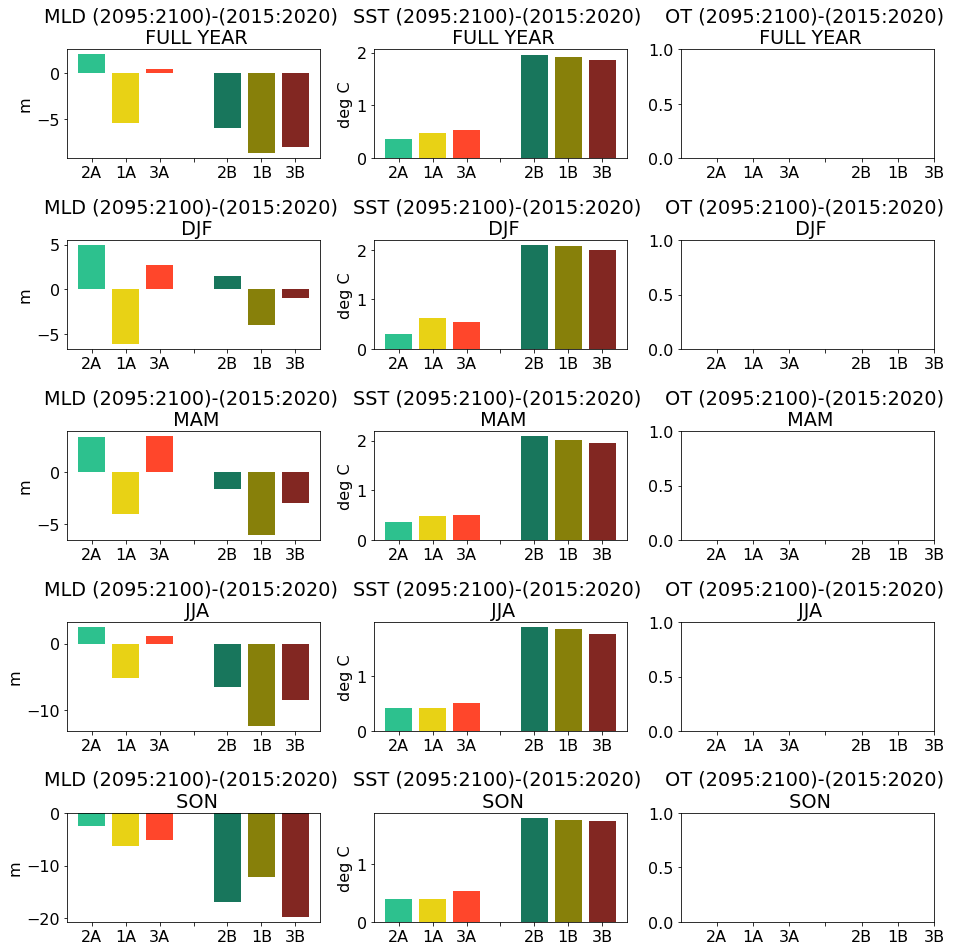

In [23]:
fact = 0.9
fig, axs = plt.subplots(5,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
axs[ind].bar(2, mld_1A_2095_2100_FY-mld_1A_2015_2020_FY, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2095_2100_FY-mld_2A_2015_2020_FY, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2095_2100_FY-mld_3A_2015_2020_FY, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2095_2100_FY-mld_1B_2015_2020_FY, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2095_2100_FY-mld_2B_2015_2020_FY, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2095_2100_FY-mld_3B_2015_2020_FY, color = scendict['3B']['color'])

ind = 3
axs[ind].bar(2, mld_1A_2095_2100_DJF-mld_1A_2015_2020_DJF, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2095_2100_DJF-mld_2A_2015_2020_DJF, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2095_2100_DJF-mld_3A_2015_2020_DJF, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2095_2100_DJF-mld_1B_2015_2020_DJF, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2095_2100_DJF-mld_2B_2015_2020_DJF, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2095_2100_DJF-mld_3B_2015_2020_DJF, color = scendict['3B']['color'])

ind = 6
axs[ind].bar(2, mld_1A_2095_2100_MAM-mld_1A_2015_2020_MAM, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2095_2100_MAM-mld_2A_2015_2020_MAM, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2095_2100_MAM-mld_3A_2015_2020_MAM, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2095_2100_MAM-mld_1B_2015_2020_MAM, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2095_2100_MAM-mld_2B_2015_2020_MAM, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2095_2100_MAM-mld_3B_2015_2020_MAM, color = scendict['3B']['color'])

ind = 9
axs[ind].bar(2, mld_1A_2095_2100_JJA-mld_1A_2015_2020_JJA, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2095_2100_JJA-mld_2A_2015_2020_JJA, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2095_2100_JJA-mld_3A_2015_2020_JJA, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2095_2100_JJA-mld_1B_2015_2020_JJA, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2095_2100_JJA-mld_2B_2015_2020_JJA, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2095_2100_JJA-mld_3B_2015_2020_JJA, color = scendict['3B']['color'])

ind = 12
axs[ind].bar(2, mld_1A_2095_2100_SON-mld_1A_2015_2020_SON, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2095_2100_SON-mld_2A_2015_2020_SON, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2095_2100_SON-mld_3A_2015_2020_SON, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2095_2100_SON-mld_1B_2015_2020_SON, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2095_2100_SON-mld_2B_2015_2020_SON, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2095_2100_SON-mld_3B_2015_2020_SON, color = scendict['3B']['color'])

##################SST 
ind = 1+0
axs[ind].bar(2, SST_1A_2095_2100_FY-SST_1A_2015_2020_FY, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2095_2100_FY-SST_2A_2015_2020_FY, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2095_2100_FY-SST_3A_2015_2020_FY, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2095_2100_FY-SST_1B_2015_2020_FY, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2095_2100_FY-SST_2B_2015_2020_FY, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2095_2100_FY-SST_3B_2015_2020_FY, color = scendict['3B']['color'])

ind = 1+3
axs[ind].bar(2, SST_1A_2095_2100_DJF-SST_1A_2015_2020_DJF, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2095_2100_DJF-SST_2A_2015_2020_DJF, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2095_2100_DJF-SST_3A_2015_2020_DJF, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2095_2100_DJF-SST_1B_2015_2020_DJF, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2095_2100_DJF-SST_2B_2015_2020_DJF, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2095_2100_DJF-SST_3B_2015_2020_DJF, color = scendict['3B']['color'])

ind = 1+6
axs[ind].bar(2, SST_1A_2095_2100_MAM-SST_1A_2015_2020_MAM, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2095_2100_MAM-SST_2A_2015_2020_MAM, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2095_2100_MAM-SST_3A_2015_2020_MAM, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2095_2100_MAM-SST_1B_2015_2020_MAM, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2095_2100_MAM-SST_2B_2015_2020_MAM, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2095_2100_MAM-SST_3B_2015_2020_MAM, color = scendict['3B']['color'])

ind = 1+9
axs[ind].bar(2, SST_1A_2095_2100_JJA-SST_1A_2015_2020_JJA, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2095_2100_JJA-SST_2A_2015_2020_JJA, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2095_2100_JJA-SST_3A_2015_2020_JJA, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2095_2100_JJA-SST_1B_2015_2020_JJA, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2095_2100_JJA-SST_2B_2015_2020_JJA, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2095_2100_JJA-SST_3B_2015_2020_JJA, color = scendict['3B']['color'])

ind = 1+12
axs[ind].bar(2, SST_1A_2095_2100_SON-SST_1A_2015_2020_SON, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2095_2100_SON-SST_2A_2015_2020_SON, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2095_2100_SON-SST_3A_2015_2020_SON, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2095_2100_SON-SST_1B_2015_2020_SON, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2095_2100_SON-SST_2B_2015_2020_SON, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2095_2100_SON-SST_3B_2015_2020_SON, color = scendict['3B']['color'])

for i in range(0,15):
    axs[i].set_xticks(np.arange(1,8))
    axs[i].set_xticklabels(['2A','1A','3A','','2B','1B','3B'])
#
ind = 0
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n FULL YEAR'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n FULL YEAR'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n FULL YEAR')
ind = 3
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n DJF'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n DJF'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n DJF')
ind = 6
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n MAM'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n MAM'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n MAM')
ind = 9
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n JJA'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n JJA'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n JJA')
ind = 12
axs[0+ind].set_title('MLD (2095:2100)-(2015:2020) \n SON'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2095:2100)-(2015:2020) \n SON'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2095:2100)-(2015:2020) \n SON')

plt.tight_layout()
#['HIST.OZONE \n LOW TEMP.', 'HIST. OZONE \n HIGH TEMP.', 'FIXED OZONE \n LOW TEMP.', '',\
# 'FIXED OZONE \n HIGH TEMP.', '1990 OZONE \n LOW TEMP.', '1990 OZONE \n HIGH TEMP.'], fontsize = 8)

In [24]:
mld_1A_1950_1960_FY = mld_1A.somxl010.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1A_2090_2100_FY = mld_1A.somxl010.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_1B_1950_1960_FY = mld_1B.somxl010.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1B_2090_2100_FY = mld_1B.somxl010.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_2A_1950_1960_FY = mld_2A.somxl010.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2A_2090_2100_FY = mld_2A.somxl010.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_2B_1950_1960_FY = mld_2B.somxl010.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2B_2090_2100_FY = mld_2B.somxl010.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_3A_1950_1960_FY = mld_3A.somxl010.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3A_2090_2100_FY = mld_3A.somxl010.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_3B_1950_1960_FY = mld_3B.somxl010.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3B_2090_2100_FY = mld_3B.somxl010.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_1A_1950_1960_DJF = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1A_2090_2100_DJF = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_1B_1950_1960_DJF = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1B_2090_2100_DJF = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_2A_1950_1960_DJF = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2A_2090_2100_DJF = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_2B_1950_1960_DJF = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2B_2090_2100_DJF = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_3A_1950_1960_DJF = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3A_2090_2100_DJF = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_3B_1950_1960_DJF = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3B_2090_2100_DJF = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_1A_1950_1960_MAM = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1A_2090_2100_MAM = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_1B_1950_1960_MAM = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1B_2090_2100_MAM = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_2A_1950_1960_MAM = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2A_2090_2100_MAM = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_2B_1950_1960_MAM = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2B_2090_2100_MAM = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_3A_1950_1960_MAM = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3A_2090_2100_MAM = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_3B_1950_1960_MAM = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3B_2090_2100_MAM = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_1A_1950_1960_JJA = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1A_2090_2100_JJA = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_1B_1950_1960_JJA = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1B_2090_2100_JJA = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_2A_1950_1960_JJA = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2A_2090_2100_JJA = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_2B_1950_1960_JJA = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2B_2090_2100_JJA = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_3A_1950_1960_JJA = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3A_2090_2100_JJA = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_3B_1950_1960_JJA = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3B_2090_2100_JJA = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_1A_1950_1960_SON = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1A_2090_2100_SON = mld_1A.somxl010.sel(time_counter=(mld_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_1B_1950_1960_SON = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_1B_2090_2100_SON = mld_1B.somxl010.sel(time_counter=(mld_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_2A_1950_1960_SON = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2A_2090_2100_SON = mld_2A.somxl010.sel(time_counter=(mld_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_2B_1950_1960_SON = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_2B_2090_2100_SON = mld_2B.somxl010.sel(time_counter=(mld_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

mld_3A_1950_1960_SON = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3A_2090_2100_SON = mld_3A.somxl010.sel(time_counter=(mld_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
mld_3B_1950_1960_SON = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
mld_3B_2090_2100_SON = mld_3B.somxl010.sel(time_counter=(mld_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

##############
SST_1A_1950_1960_FY = SST_1A.votemper.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1A_2090_2100_FY = SST_1A.votemper.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_1B_1950_1960_FY = SST_1B.votemper.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1B_2090_2100_FY = SST_1B.votemper.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_2A_1950_1960_FY = SST_2A.votemper.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2A_2090_2100_FY = SST_2A.votemper.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_2B_1950_1960_FY = SST_2B.votemper.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2B_2090_2100_FY = SST_2B.votemper.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_3A_1950_1960_FY = SST_3A.votemper.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3A_2090_2100_FY = SST_3A.votemper.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_3B_1950_1960_FY = SST_3B.votemper.sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3B_2090_2100_FY = SST_3B.votemper.sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_1A_1950_1960_DJF = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1A_2090_2100_DJF = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_1B_1950_1960_DJF = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1B_2090_2100_DJF = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_2A_1950_1960_DJF = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2A_2090_2100_DJF = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_2B_1950_1960_DJF = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2B_2090_2100_DJF = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_3A_1950_1960_DJF = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3A_2090_2100_DJF = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_3B_1950_1960_DJF = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3B_2090_2100_DJF = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'DJF')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_1A_1950_1960_MAM = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1A_2090_2100_MAM = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_1B_1950_1960_MAM = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1B_2090_2100_MAM = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_2A_1950_1960_MAM = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2A_2090_2100_MAM = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_2B_1950_1960_MAM = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2B_2090_2100_MAM = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_3A_1950_1960_MAM = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3A_2090_2100_MAM = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_3B_1950_1960_MAM = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3B_2090_2100_MAM = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'MAM')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_1A_1950_1960_JJA = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1A_2090_2100_JJA = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_1B_1950_1960_JJA = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1B_2090_2100_JJA = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_2A_1950_1960_JJA = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2A_2090_2100_JJA = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_2B_1950_1960_JJA = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2B_2090_2100_JJA = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_3A_1950_1960_JJA = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3A_2090_2100_JJA = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_3B_1950_1960_JJA = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3B_2090_2100_JJA = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'JJA')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_1A_1950_1960_SON = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1A_2090_2100_SON = SST_1A.votemper.sel(time_counter=(SST_1A['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_1B_1950_1960_SON = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_1B_2090_2100_SON = SST_1B.votemper.sel(time_counter=(SST_1B['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_2A_1950_1960_SON = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2A_2090_2100_SON = SST_2A.votemper.sel(time_counter=(SST_2A['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_2B_1950_1960_SON = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_2B_2090_2100_SON = SST_2B.votemper.sel(time_counter=(SST_2B['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()

SST_3A_1950_1960_SON = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3A_2090_2100_SON = SST_3A.votemper.sel(time_counter=(SST_3A['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()
SST_3B_1950_1960_SON = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('1950-01-01', '1960-01-01')).values.mean()
SST_3B_2090_2100_SON = SST_3B.votemper.sel(time_counter=(SST_3B['time_counter.season'] == 'SON')).sel(time_counter=slice('2090-01-01', '2100-01-01')).values.mean()



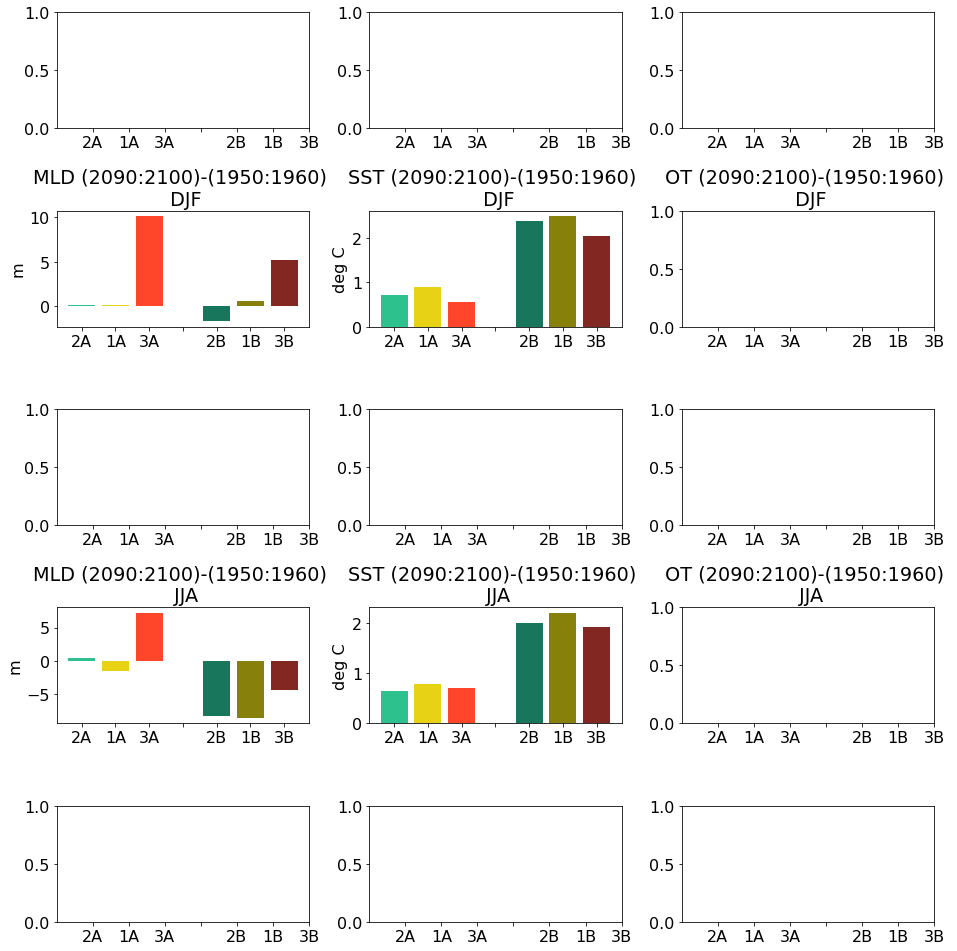

In [25]:
fact = 0.9
fig, axs = plt.subplots(5,3, figsize=(15*fact, 15*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

# ind = 0
# axs[ind].bar(2, mld_1A_2090_2100_FY-mld_1A_1950_1960_FY, color = scendict['1A']['color'])
# axs[ind].bar(1, mld_2A_2090_2100_FY-mld_2A_1950_1960_FY, color = scendict['2A']['color'])
# axs[ind].bar(3, mld_3A_2090_2100_FY-mld_3A_1950_1960_FY, color = scendict['3A']['color'])
# axs[ind].bar(6, mld_1B_2090_2100_FY-mld_1B_1950_1960_FY, color = scendict['1B']['color'])
# axs[ind].bar(5, mld_2B_2090_2100_FY-mld_2B_1950_1960_FY, color = scendict['2B']['color'])
# axs[ind].bar(7, mld_3B_2090_2100_FY-mld_3B_1950_1960_FY, color = scendict['3B']['color'])

ind = 3
axs[ind].bar(2, mld_1A_2090_2100_DJF-mld_1A_1950_1960_DJF, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2090_2100_DJF-mld_2A_1950_1960_DJF, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2090_2100_DJF-mld_3A_1950_1960_DJF, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2090_2100_DJF-mld_1B_1950_1960_DJF, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2090_2100_DJF-mld_2B_1950_1960_DJF, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2090_2100_DJF-mld_3B_1950_1960_DJF, color = scendict['3B']['color'])

# ind = 6
# axs[ind].bar(2, mld_1A_2090_2100_MAM-mld_1A_1950_1960_MAM, color = scendict['1A']['color'])
# axs[ind].bar(1, mld_2A_2090_2100_MAM-mld_2A_1950_1960_MAM, color = scendict['2A']['color'])
# axs[ind].bar(3, mld_3A_2090_2100_MAM-mld_3A_1950_1960_MAM, color = scendict['3A']['color'])
# axs[ind].bar(6, mld_1B_2090_2100_MAM-mld_1B_1950_1960_MAM, color = scendict['1B']['color'])
# axs[ind].bar(5, mld_2B_2090_2100_MAM-mld_2B_1950_1960_MAM, color = scendict['2B']['color'])
# axs[ind].bar(7, mld_3B_2090_2100_MAM-mld_3B_1950_1960_MAM, color = scendict['3B']['color'])

ind = 9
axs[ind].bar(2, mld_1A_2090_2100_JJA-mld_1A_1950_1960_JJA, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2090_2100_JJA-mld_2A_1950_1960_JJA, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2090_2100_JJA-mld_3A_1950_1960_JJA, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2090_2100_JJA-mld_1B_1950_1960_JJA, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2090_2100_JJA-mld_2B_1950_1960_JJA, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2090_2100_JJA-mld_3B_1950_1960_JJA, color = scendict['3B']['color'])

# ind = 12
# axs[ind].bar(2, mld_1A_2090_2100_SON-mld_1A_1950_1960_SON, color = scendict['1A']['color'])
# axs[ind].bar(1, mld_2A_2090_2100_SON-mld_2A_1950_1960_SON, color = scendict['2A']['color'])
# axs[ind].bar(3, mld_3A_2090_2100_SON-mld_3A_1950_1960_SON, color = scendict['3A']['color'])
# axs[ind].bar(6, mld_1B_2090_2100_SON-mld_1B_1950_1960_SON, color = scendict['1B']['color'])
# axs[ind].bar(5, mld_2B_2090_2100_SON-mld_2B_1950_1960_SON, color = scendict['2B']['color'])
# axs[ind].bar(7, mld_3B_2090_2100_SON-mld_3B_1950_1960_SON, color = scendict['3B']['color'])

##################SST 
# ind = 1+0
# axs[ind].bar(2, SST_1A_2090_2100_FY-SST_1A_1950_1960_FY, color = scendict['1A']['color'])
# axs[ind].bar(1, SST_2A_2090_2100_FY-SST_2A_1950_1960_FY, color = scendict['2A']['color'])
# axs[ind].bar(3, SST_3A_2090_2100_FY-SST_3A_1950_1960_FY, color = scendict['3A']['color'])
# axs[ind].bar(6, SST_1B_2090_2100_FY-SST_1B_1950_1960_FY, color = scendict['1B']['color'])
# axs[ind].bar(5, SST_2B_2090_2100_FY-SST_2B_1950_1960_FY, color = scendict['2B']['color'])
# axs[ind].bar(7, SST_3B_2090_2100_FY-SST_3B_1950_1960_FY, color = scendict['3B']['color'])

ind = 1+3
axs[ind].bar(2, SST_1A_2090_2100_DJF-SST_1A_1950_1960_DJF, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2090_2100_DJF-SST_2A_1950_1960_DJF, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2090_2100_DJF-SST_3A_1950_1960_DJF, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2090_2100_DJF-SST_1B_1950_1960_DJF, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2090_2100_DJF-SST_2B_1950_1960_DJF, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2090_2100_DJF-SST_3B_1950_1960_DJF, color = scendict['3B']['color'])

# ind = 1+6
# axs[ind].bar(2, SST_1A_2090_2100_MAM-SST_1A_1950_1960_MAM, color = scendict['1A']['color'])
# axs[ind].bar(1, SST_2A_2090_2100_MAM-SST_2A_1950_1960_MAM, color = scendict['2A']['color'])
# axs[ind].bar(3, SST_3A_2090_2100_MAM-SST_3A_1950_1960_MAM, color = scendict['3A']['color'])
# axs[ind].bar(6, SST_1B_2090_2100_MAM-SST_1B_1950_1960_MAM, color = scendict['1B']['color'])
# axs[ind].bar(5, SST_2B_2090_2100_MAM-SST_2B_1950_1960_MAM, color = scendict['2B']['color'])
# axs[ind].bar(7, SST_3B_2090_2100_MAM-SST_3B_1950_1960_MAM, color = scendict['3B']['color'])

ind = 1+9
axs[ind].bar(2, SST_1A_2090_2100_JJA-SST_1A_1950_1960_JJA, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2090_2100_JJA-SST_2A_1950_1960_JJA, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2090_2100_JJA-SST_3A_1950_1960_JJA, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2090_2100_JJA-SST_1B_1950_1960_JJA, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2090_2100_JJA-SST_2B_1950_1960_JJA, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2090_2100_JJA-SST_3B_1950_1960_JJA, color = scendict['3B']['color'])

# ind = 1+12
# axs[ind].bar(2, SST_1A_2090_2100_SON-SST_1A_1950_1960_SON, color = scendict['1A']['color'])
# axs[ind].bar(1, SST_2A_2090_2100_SON-SST_2A_1950_1960_SON, color = scendict['2A']['color'])
# axs[ind].bar(3, SST_3A_2090_2100_SON-SST_3A_1950_1960_SON, color = scendict['3A']['color'])
# axs[ind].bar(6, SST_1B_2090_2100_SON-SST_1B_1950_1960_SON, color = scendict['1B']['color'])
# axs[ind].bar(5, SST_2B_2090_2100_SON-SST_2B_1950_1960_SON, color = scendict['2B']['color'])
# axs[ind].bar(7, SST_3B_2090_2100_SON-SST_3B_1950_1960_SON, color = scendict['3B']['color'])

for i in range(0,15):
    axs[i].set_xticks(np.arange(1,8))
    axs[i].set_xticklabels(['2A','1A','3A','','2B','1B','3B'])
#
# ind = 0
# axs[0+ind].set_title('MLD (2090:2100)-(1950:1960) \n FULL YEAR'); axs[0+ind].set_ylabel('m')
# axs[1+ind].set_title('SST (2090:2100)-(1950:1960) \n FULL YEAR'); axs[1+ind].set_ylabel('deg C')
# axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n FULL YEAR')
ind = 3
axs[0+ind].set_title('MLD (2090:2100)-(1950:1960) \n DJF'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2090:2100)-(1950:1960) \n DJF'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n DJF')
# ind = 6
# axs[0+ind].set_title('MLD (2090:2100)-(1950:1960) \n MAM'); axs[0+ind].set_ylabel('m')
# axs[1+ind].set_title('SST (2090:2100)-(1950:1960) \n MAM'); axs[1+ind].set_ylabel('deg C')
# axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n MAM')
ind = 9
axs[0+ind].set_title('MLD (2090:2100)-(1950:1960) \n JJA'); axs[0+ind].set_ylabel('m')
axs[1+ind].set_title('SST (2090:2100)-(1950:1960) \n JJA'); axs[1+ind].set_ylabel('deg C')
axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n JJA')
# ind = 12
# axs[0+ind].set_title('MLD (2090:2100)-(1950:1960) \n SON'); axs[0+ind].set_ylabel('m')
# axs[1+ind].set_title('SST (2090:2100)-(1950:1960) \n SON'); axs[1+ind].set_ylabel('deg C')
# axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n SON')

plt.tight_layout()
#['HIST.OZONE \n LOW TEMP.', 'HIST. OZONE \n HIGH TEMP.', 'FIXED OZONE \n LOW TEMP.', '',\
# 'FIXED OZONE \n HIGH TEMP.', '1990 OZONE \n LOW TEMP.', '1990 OZONE \n HIGH TEMP.'], fontsize = 8)

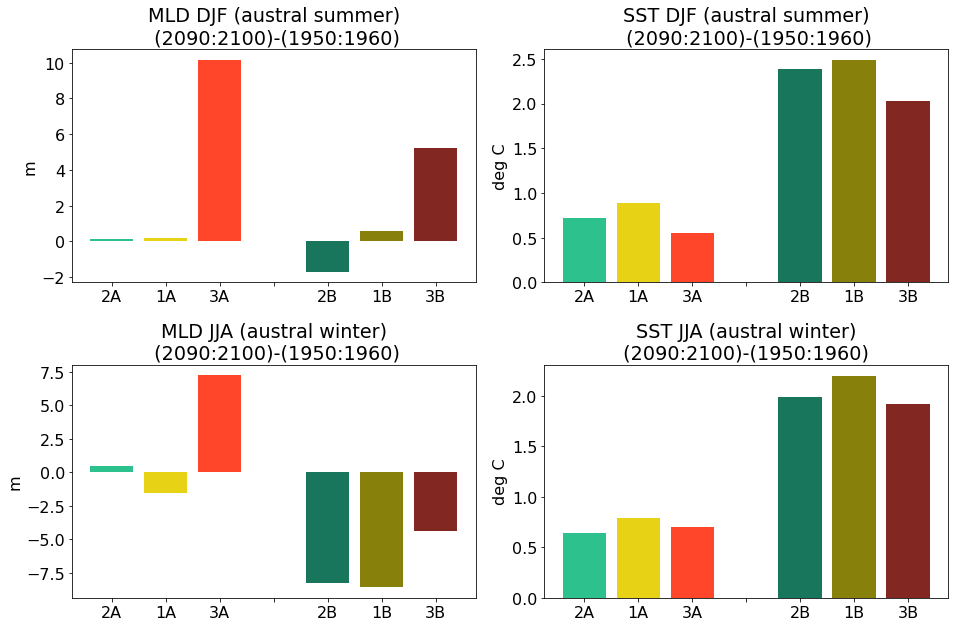

In [26]:
fact = 0.9
fig, axs = plt.subplots(2,2, figsize=(15*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

# ind = 0
# axs[ind].bar(2, mld_1A_2090_2100_FY-mld_1A_1950_1960_FY, color = scendict['1A']['color'])
# axs[ind].bar(1, mld_2A_2090_2100_FY-mld_2A_1950_1960_FY, color = scendict['2A']['color'])
# axs[ind].bar(3, mld_3A_2090_2100_FY-mld_3A_1950_1960_FY, color = scendict['3A']['color'])
# axs[ind].bar(6, mld_1B_2090_2100_FY-mld_1B_1950_1960_FY, color = scendict['1B']['color'])
# axs[ind].bar(5, mld_2B_2090_2100_FY-mld_2B_1950_1960_FY, color = scendict['2B']['color'])
# axs[ind].bar(7, mld_3B_2090_2100_FY-mld_3B_1950_1960_FY, color = scendict['3B']['color'])

ind = 0
axs[ind].bar(2, mld_1A_2090_2100_DJF-mld_1A_1950_1960_DJF, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2090_2100_DJF-mld_2A_1950_1960_DJF, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2090_2100_DJF-mld_3A_1950_1960_DJF, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2090_2100_DJF-mld_1B_1950_1960_DJF, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2090_2100_DJF-mld_2B_1950_1960_DJF, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2090_2100_DJF-mld_3B_1950_1960_DJF, color = scendict['3B']['color'])

# ind = 6
# axs[ind].bar(2, mld_1A_2090_2100_MAM-mld_1A_1950_1960_MAM, color = scendict['1A']['color'])
# axs[ind].bar(1, mld_2A_2090_2100_MAM-mld_2A_1950_1960_MAM, color = scendict['2A']['color'])
# axs[ind].bar(3, mld_3A_2090_2100_MAM-mld_3A_1950_1960_MAM, color = scendict['3A']['color'])
# axs[ind].bar(6, mld_1B_2090_2100_MAM-mld_1B_1950_1960_MAM, color = scendict['1B']['color'])
# axs[ind].bar(5, mld_2B_2090_2100_MAM-mld_2B_1950_1960_MAM, color = scendict['2B']['color'])
# axs[ind].bar(7, mld_3B_2090_2100_MAM-mld_3B_1950_1960_MAM, color = scendict['3B']['color'])

ind = 2
axs[ind].bar(2, mld_1A_2090_2100_JJA-mld_1A_1950_1960_JJA, color = scendict['1A']['color'])
axs[ind].bar(1, mld_2A_2090_2100_JJA-mld_2A_1950_1960_JJA, color = scendict['2A']['color'])
axs[ind].bar(3, mld_3A_2090_2100_JJA-mld_3A_1950_1960_JJA, color = scendict['3A']['color'])
axs[ind].bar(6, mld_1B_2090_2100_JJA-mld_1B_1950_1960_JJA, color = scendict['1B']['color'])
axs[ind].bar(5, mld_2B_2090_2100_JJA-mld_2B_1950_1960_JJA, color = scendict['2B']['color'])
axs[ind].bar(7, mld_3B_2090_2100_JJA-mld_3B_1950_1960_JJA, color = scendict['3B']['color'])

# ind = 12
# axs[ind].bar(2, mld_1A_2090_2100_SON-mld_1A_1950_1960_SON, color = scendict['1A']['color'])
# axs[ind].bar(1, mld_2A_2090_2100_SON-mld_2A_1950_1960_SON, color = scendict['2A']['color'])
# axs[ind].bar(3, mld_3A_2090_2100_SON-mld_3A_1950_1960_SON, color = scendict['3A']['color'])
# axs[ind].bar(6, mld_1B_2090_2100_SON-mld_1B_1950_1960_SON, color = scendict['1B']['color'])
# axs[ind].bar(5, mld_2B_2090_2100_SON-mld_2B_1950_1960_SON, color = scendict['2B']['color'])
# axs[ind].bar(7, mld_3B_2090_2100_SON-mld_3B_1950_1960_SON, color = scendict['3B']['color'])

##################SST 
# ind = 1+0
# axs[ind].bar(2, SST_1A_2090_2100_FY-SST_1A_1950_1960_FY, color = scendict['1A']['color'])
# axs[ind].bar(1, SST_2A_2090_2100_FY-SST_2A_1950_1960_FY, color = scendict['2A']['color'])
# axs[ind].bar(3, SST_3A_2090_2100_FY-SST_3A_1950_1960_FY, color = scendict['3A']['color'])
# axs[ind].bar(6, SST_1B_2090_2100_FY-SST_1B_1950_1960_FY, color = scendict['1B']['color'])
# axs[ind].bar(5, SST_2B_2090_2100_FY-SST_2B_1950_1960_FY, color = scendict['2B']['color'])
# axs[ind].bar(7, SST_3B_2090_2100_FY-SST_3B_1950_1960_FY, color = scendict['3B']['color'])

ind = 1
axs[ind].bar(2, SST_1A_2090_2100_DJF-SST_1A_1950_1960_DJF, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2090_2100_DJF-SST_2A_1950_1960_DJF, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2090_2100_DJF-SST_3A_1950_1960_DJF, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2090_2100_DJF-SST_1B_1950_1960_DJF, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2090_2100_DJF-SST_2B_1950_1960_DJF, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2090_2100_DJF-SST_3B_1950_1960_DJF, color = scendict['3B']['color'])

# ind = 1+6
# axs[ind].bar(2, SST_1A_2090_2100_MAM-SST_1A_1950_1960_MAM, color = scendict['1A']['color'])
# axs[ind].bar(1, SST_2A_2090_2100_MAM-SST_2A_1950_1960_MAM, color = scendict['2A']['color'])
# axs[ind].bar(3, SST_3A_2090_2100_MAM-SST_3A_1950_1960_MAM, color = scendict['3A']['color'])
# axs[ind].bar(6, SST_1B_2090_2100_MAM-SST_1B_1950_1960_MAM, color = scendict['1B']['color'])
# axs[ind].bar(5, SST_2B_2090_2100_MAM-SST_2B_1950_1960_MAM, color = scendict['2B']['color'])
# axs[ind].bar(7, SST_3B_2090_2100_MAM-SST_3B_1950_1960_MAM, color = scendict['3B']['color'])

ind = 3
axs[ind].bar(2, SST_1A_2090_2100_JJA-SST_1A_1950_1960_JJA, color = scendict['1A']['color'])
axs[ind].bar(1, SST_2A_2090_2100_JJA-SST_2A_1950_1960_JJA, color = scendict['2A']['color'])
axs[ind].bar(3, SST_3A_2090_2100_JJA-SST_3A_1950_1960_JJA, color = scendict['3A']['color'])
axs[ind].bar(6, SST_1B_2090_2100_JJA-SST_1B_1950_1960_JJA, color = scendict['1B']['color'])
axs[ind].bar(5, SST_2B_2090_2100_JJA-SST_2B_1950_1960_JJA, color = scendict['2B']['color'])
axs[ind].bar(7, SST_3B_2090_2100_JJA-SST_3B_1950_1960_JJA, color = scendict['3B']['color'])

# ind = 1+12
# axs[ind].bar(2, SST_1A_2090_2100_SON-SST_1A_1950_1960_SON, color = scendict['1A']['color'])
# axs[ind].bar(1, SST_2A_2090_2100_SON-SST_2A_1950_1960_SON, color = scendict['2A']['color'])
# axs[ind].bar(3, SST_3A_2090_2100_SON-SST_3A_1950_1960_SON, color = scendict['3A']['color'])
# axs[ind].bar(6, SST_1B_2090_2100_SON-SST_1B_1950_1960_SON, color = scendict['1B']['color'])
# axs[ind].bar(5, SST_2B_2090_2100_SON-SST_2B_1950_1960_SON, color = scendict['2B']['color'])
# axs[ind].bar(7, SST_3B_2090_2100_SON-SST_3B_1950_1960_SON, color = scendict['3B']['color'])

for i in range(0,4):
    axs[i].set_xticks(np.arange(1,8))
    axs[i].set_xticklabels(['2A','1A','3A','','2B','1B','3B'])
#
# ind = 0
# axs[0+ind].set_title('MLD (2090:2100)-(1950:1960) \n FULL YEAR'); axs[0+ind].set_ylabel('m')
# axs[1+ind].set_title('SST (2090:2100)-(1950:1960) \n FULL YEAR'); axs[1+ind].set_ylabel('deg C')
# axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n FULL YEAR')
ind = 3
axs[0].set_title('MLD DJF (austral summer)\n (2090:2100)-(1950:1960)'); axs[0].set_ylabel('m')
axs[1].set_title('SST DJF (austral summer)\n (2090:2100)-(1950:1960)'); axs[1].set_ylabel('deg C')
#axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n DJF')
# ind = 6
# axs[0+ind].set_title('MLD (2090:2100)-(1950:1960) \n MAM'); axs[0+ind].set_ylabel('m')
# axs[1+ind].set_title('SST (2090:2100)-(1950:1960) \n MAM'); axs[1+ind].set_ylabel('deg C')
# axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n MAM')
ind = 9
axs[2].set_title('MLD JJA (austral winter)\n (2090:2100)-(1950:1960)'); axs[2].set_ylabel('m')
axs[3].set_title('SST JJA (austral winter)\n (2090:2100)-(1950:1960) '); axs[3].set_ylabel('deg C')
#axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n JJA')
# ind = 12
# axs[0+ind].set_title('MLD (2090:2100)-(1950:1960) \n SON'); axs[0+ind].set_ylabel('m')
# axs[1+ind].set_title('SST (2090:2100)-(1950:1960) \n SON'); axs[1+ind].set_ylabel('deg C')
# axs[2+ind].set_title('OT (2090:2100)-(1950:1960) \n SON')

plt.tight_layout()
fig.savefig('./figs/bargraphposter.jpg', dpi = 300)
#['HIST.OZONE \n LOW TEMP.', 'HIST. OZONE \n HIGH TEMP.', 'FIXED OZONE \n LOW TEMP.', '',\
# 'FIXED OZONE \n HIGH TEMP.', '1990 OZONE \n LOW TEMP.', '1990 OZONE \n HIGH TEMP.'], fontsize = 8)

In [27]:
scens = ['1A', '1B', '2A', '2B', '3A', '3B']
labs = []
for i in range(0,len(scens)):
    tsc = scens[i]
    label = scendict[tsc]['name']
    labs.append(label)
    
print(labs)

['HIST.OZONE \n LOW TEMP.', 'HIST. OZONE \n HIGH TEMP.', 'FIXED OZONE \n LOW TEMP.', 'FIXED OZONE \n HIGH TEMP.', '1990 OZONE \n LOW TEMP.', '1990 OZONE \n HIGH TEMP.']
